# BCN 2020-2021 Data Wrangling

Data Wrangling is the process of cleaning, structuring and enriching raw data into a desired format for better decision making in less time


**Index**

- [Environment](#Environment)


- [Data Wrangling](#DataWrangling)
    - [Explore Data](#ExploreData)
    - [Clean Data](#CleanData)
    - [Remove Useless Columns](#RemoveColumns)
    - [Add New Columns](#AddColumns)


- [Clean CSV](#CleanCSV)


- [Insigths](#Insights)

## Environment

#### import libraries

In [1]:
# Pandas and Numpy
import pandas as pd
import numpy as np

#Time 
import time
from datetime import datetime
import datetime as dt

# Maths
import math
from scipy import stats

#Transform
from sklearn import preprocessing
from sklearn.preprocessing import OneHotEncoder


# Visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

#### import data

In [2]:
apps = pd.read_csv("apps_allYears_semiClean.csv",parse_dates=["Bootcamp Start Date","Created Date","Close Date"],low_memory=False) 

To go on we select only **Bootcamp Year=2020&2021** and **Campus - Timezone=BCN&2021**

In [3]:
apps["Bootcamp Year"].value_counts()

2020    11060
2019     7225
2018     4607
2021     2676
2017     2147
2016     1008
Name: Bootcamp Year, dtype: int64

In [4]:
apps["Campus - Timezone"].value_counts()

MAD            4632
PAR            4343
BCN            3876
MIA            3483
MEX            3044
SAO            2606
BER            2186
RMT-Europe     1656
AMS            1326
LIS            1129
RMT-America     442
Name: Campus - Timezone, dtype: int64

In [5]:
apps_BCN2020=apps[(apps["Campus - Timezone"]=="BCN") & (apps["Bootcamp Year"]==2020)]

In [6]:
apps_BCN2020.shape

(904, 58)

In [7]:
apps_BCN20201=apps[((apps["Campus - Timezone"]=="BCN") & (apps["Bootcamp Year"]==2020)) | ((apps["Campus - Timezone"]=="BCN")& (apps["Bootcamp Year"]==2021))]


In [8]:
apps_BCN20201.shape

(1118, 58)

### Explore data BCN20201 

In [9]:
apps_BCN20201.isnull().sum()

Opportunity ID                                 0
Opportunity Name                               0
Has Courses                                    0
Bootcamp Course                                0
Bootcamp Format                                0
Bootcamp Year                                  0
Bootcamp Start Date                            0
Campus                                         0
Campus - Timezone                              0
Created Date                                   0
Close Date                                     0
Invoice Date                                 906
Stage                                          0
Discount Amount (converted) Currency         856
Discount Amount (converted)                    0
Scholarship Amount (converted) Currency     1109
Scholarship Amount (converted)                 0
Amount (converted) Currency                    0
Amount (converted)                             0
Net Amount With VAT (converted) Currency       0
Net Amount With VAT 

In [10]:
total_values_xCol= apps_BCN20201.count()+apps_BCN20201.isnull().sum()

In [11]:
total_values= total_values_xCol.sum()

In [12]:
total_ExValues=apps_BCN20201.count().sum()

In [13]:
total_NanValues=apps_BCN20201.isnull().sum().sum()

In [14]:
print(round(total_NanValues/total_values*100,2),"% of our data is null")
print("*Taking into account all IH organic apps (40228) and the 58 columns from IH that refers to the user and its moves during the Admissions Process")


33.98 % of our data is null
*Taking into account all IH organic apps (40228) and the 58 columns from IH that refers to the user and its moves during the Admissions Process


In [15]:
# check nuls

In [16]:
apps_BCN20201.isnull().sum().nlargest(14)

Last Email Date                            1118
Person Account: Company Located in         1118
Person Account: Linkedin URL               1118
Programming languages                      1118
Scholarship Amount (converted) Currency    1109
Needs Financing                            1104
Age                                        1101
Last Call Date                              936
Invoice Date                                906
Last Event Date                             890
Discount Amount (converted) Currency        856
Person Account: Type of Position            715
Last Task Date                              701
Inactive Days                               687
dtype: int64

In [17]:
column_with_nan = apps_BCN20201.columns[apps_BCN20201.isnull().any()]

In [18]:
df_shape=apps_BCN20201.shape

In [19]:
for column in column_with_nan:
    if apps_BCN20201[column].isnull().sum()*100.0/df_shape[0] > 60:
        apps_BCN20201.drop(column,1, inplace=True)

/usr/local/lib/python3.9/site-packages/pandas/core/frame.py:4167: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [20]:
apps_BCN20201.isnull().sum()

Opportunity ID                                0
Opportunity Name                              0
Has Courses                                   0
Bootcamp Course                               0
Bootcamp Format                               0
Bootcamp Year                                 0
Bootcamp Start Date                           0
Campus                                        0
Campus - Timezone                             0
Created Date                                  0
Close Date                                    0
Stage                                         0
Discount Amount (converted)                   0
Scholarship Amount (converted)                0
Amount (converted) Currency                   0
Amount (converted)                            0
Net Amount With VAT (converted) Currency      0
Net Amount With VAT (converted)               0
Drop                                          0
Drop Reason                                   0
Lost Deal Reason                        

In [21]:
index_with_nan = apps_BCN20201.index[apps_BCN20201.isnull().any(axis=1)]
index_with_nan.shape

(971,)

In [22]:
apps_BCN20201.drop(index_with_nan,0, inplace=True)

In [23]:
apps_BCN20201.shape

(147, 43)

# CleanData 20201

Now will continue to clean the columns we'll use.

**Column: Account: Last Activity**

In [24]:
apps_BCN20201['Account: Last Activity']

107      22/09/2020
257       8/09/2020
272      11/08/2020
682      15/10/2020
966      31/08/2020
            ...    
28300    19/11/2020
28386     6/08/2020
28389     4/06/2020
28551    10/08/2020
28683    27/07/2020
Name: Account: Last Activity, Length: 147, dtype: object

In [25]:
apps_BCN20201["Account: Last Activity"]= pd.to_datetime(apps["Account: Last Activity"])

<ipython-input-25-b113029573c4>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  apps_BCN20201["Account: Last Activity"]= pd.to_datetime(apps["Account: Last Activity"])


**Column: First touchpoint Date**

In [26]:
apps_BCN20201['First touchpoint Date']

107      27/08/2020 15:14
257      26/03/2020 15:42
272      23/07/2020 14:42
682      27/03/2020 13:44
966      29/06/2020 13:04
               ...       
28300     5/06/2020 11:44
28386     3/06/2020 18:43
28389     3/06/2020 18:39
28551    27/07/2020 18:09
28683    27/07/2020 12:41
Name: First touchpoint Date, Length: 147, dtype: object

In [27]:
apps_BCN20201['First touchpoint Date']=apps_BCN20201['First touchpoint Date'].apply(lambda x: x[:10])

<ipython-input-27-00c68c246c3a>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  apps_BCN20201['First touchpoint Date']=apps_BCN20201['First touchpoint Date'].apply(lambda x: x[:10])


In [28]:
apps_BCN20201['First touchpoint Date']= pd.to_datetime(apps_BCN20201['First touchpoint Date'])

<ipython-input-28-4f67e09ca177>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  apps_BCN20201['First touchpoint Date']= pd.to_datetime(apps_BCN20201['First touchpoint Date'])


**Column: First Touchpoint type**

In [29]:
apps_BCN20201['First Touchpoint type'].value_counts()

Call    147
Name: First Touchpoint type, dtype: int64

We'll later remove this columns as it only have a unique value

**Column: Hours Before First Touchpoint**

In [30]:
apps_BCN20201['Hours Before First Touchpoint']

107      1010,94
257      1275,60
272       149,47
682         1,69
966        88,11
          ...   
28300      15,09
28386       0,87
28389       2,05
28551     308,76
28683     161,91
Name: Hours Before First Touchpoint, Length: 147, dtype: object

In [31]:
apps_BCN20201['Hours Before First Touchpoint'] = apps_BCN20201['Hours Before First Touchpoint'].str.replace(",",".")

<ipython-input-31-5344d6d95dcc>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  apps_BCN20201['Hours Before First Touchpoint'] = apps_BCN20201['Hours Before First Touchpoint'].str.replace(",",".")


In [32]:
apps_BCN20201['Hours Before First Touchpoint'] = apps_BCN20201['Hours Before First Touchpoint'].apply(pd.to_numeric, errors='coerce')

<ipython-input-32-1c94fede6871>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  apps_BCN20201['Hours Before First Touchpoint'] = apps_BCN20201['Hours Before First Touchpoint'].apply(pd.to_numeric, errors='coerce')


**Stage Duration**

In [33]:
apps_BCN20201['Stage Duration']

107       77.0
257      229.0
272      102.0
682      218.0
966       99.0
         ...  
28300     47.0
28386    179.0
28389    187.0
28551     92.0
28683     62.0
Name: Stage Duration, Length: 147, dtype: float64

**Account: Last Modified Date**

In [34]:
apps_BCN20201['Account: Last Modified Date']

107       4/12/2020
257      26/11/2020
272       4/12/2020
682       9/10/2020
966       8/10/2020
            ...    
28300    26/11/2020
28386     2/11/2020
28389     7/12/2020
28551     8/10/2020
28683     8/10/2020
Name: Account: Last Modified Date, Length: 147, dtype: object

In [35]:
apps_BCN20201['Account: Last Modified Date']= pd.to_datetime(apps_BCN20201['Account: Last Modified Date'])

<ipython-input-35-efa61643b4fe>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  apps_BCN20201['Account: Last Modified Date']= pd.to_datetime(apps_BCN20201['Account: Last Modified Date'])


**Person Account: Nationality**

In [36]:
apps_BCN20201["Person Account: Nationality"].value_counts()

Spain             79
Spanish           16
Argentina         10
Venezuela          5
Brazil             5
Poland             3
Italian            3
Mexico             2
Romania            2
United States      2
United Kingdom     2
Panama             1
Germany            1
Italy              1
Bulgaria           1
Colombia           1
Croatia            1
Bolivia            1
India              1
Puerto Rico        1
Ecuador            1
Djibouti           1
French             1
Ireland            1
Ghana              1
Cuba               1
Costa Rica         1
German             1
Russia             1
Name: Person Account: Nationality, dtype: int64

In [37]:
apps_BCN20201["Person Account: Nationality"][(apps_BCN20201["Person Account: Nationality"]=="Spanish"
                                    )]="Spain" 

<ipython-input-37-522ce9349e99>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  apps_BCN20201["Person Account: Nationality"][(apps_BCN20201["Person Account: Nationality"]=="Spanish"
/usr/local/lib/python3.9/site-packages/pandas/core/series.py:1021: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._where(~key, value, inplace=True)


In [38]:
apps_BCN20201["Person Account: Nationality"][(apps_BCN20201["Person Account: Nationality"]=="Argentina")|
                                             (apps_BCN20201["Person Account: Nationality"]=="Brazil")|
                                             (apps_BCN20201["Person Account: Nationality"]=="Venezuela")|
                                             (apps_BCN20201["Person Account: Nationality"]=="United States")|
                                             (apps_BCN20201["Person Account: Nationality"]=="Bolivia")|
                                             (apps_BCN20201["Person Account: Nationality"]=="Cuba")|
                                             (apps_BCN20201["Person Account: Nationality"]=="Ecuador")|
                                             (apps_BCN20201["Person Account: Nationality"]=="Panama")|
                                             (apps_BCN20201["Person Account: Nationality"]=="Costa Rica")|
                                             (apps_BCN20201["Person Account: Nationality"]=="Puerto Rica")|
                                             (apps_BCN20201["Person Account: Nationality"]=="Puerto Rica")
                                            ]="Americas" 

<ipython-input-38-e531b3e4dfd5>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  apps_BCN20201["Person Account: Nationality"][(apps_BCN20201["Person Account: Nationality"]=="Argentina")|


In [39]:
apps_BCN20201["Person Account: Nationality"][(apps_BCN20201["Person Account: Nationality"]!="Spain")&
                                            (apps_BCN20201["Person Account: Nationality"]!="Americas")
                                            ]="Europa-Asia" 

<ipython-input-39-aaea839d83f9>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  apps_BCN20201["Person Account: Nationality"][(apps_BCN20201["Person Account: Nationality"]!="Spain")&


#### Person Account: First & Last Click Medium

In [40]:
apps_BCN20201["First Click Medium"].value_counts()

cpc          73
organic      40
(none)       25
socialads     4
referral      3
social        2
Name: First Click Medium, dtype: int64

In [41]:
apps_BCN20201["Last Click Medium"].value_counts()

cpc          67
organic      47
(none)       18
referral      8
socialads     4
social        3
Name: Last Click Medium, dtype: int64

In [42]:
apps_BCN20201.isnull().sum()

Opportunity ID                              0
Opportunity Name                            0
Has Courses                                 0
Bootcamp Course                             0
Bootcamp Format                             0
Bootcamp Year                               0
Bootcamp Start Date                         0
Campus                                      0
Campus - Timezone                           0
Created Date                                0
Close Date                                  0
Stage                                       0
Discount Amount (converted)                 0
Scholarship Amount (converted)              0
Amount (converted) Currency                 0
Amount (converted)                          0
Net Amount With VAT (converted) Currency    0
Net Amount With VAT (converted)             0
Drop                                        0
Drop Reason                                 0
Lost Deal Reason                            0
Stage Before Lost                 

## RemoveColumns 
To continue, we remove not usefull columns or those than bring colliniarity (such as Lost lead reasons), to have a 100% clean df to transform and add new columns

In [43]:
apps_BCN20201.drop(columns=["Opportunity ID", "Opportunity Name", "Has Courses",
                           "Campus","All Traffic Sources","First Click Medium","First Click Source",
                           "Last Click Medium", "Last Click Source","Last Modified Date", 
                           "Account: Created Date", "Account: Last Activity","First Touchpoint type",
                           "Lost Deal Reason","Stage Before Lost","Amount (converted) Currency",
                           "Net Amount With VAT (converted) Currency"
                  ], inplace=True)

In [44]:
apps_BCN20201.head()

,Bootcamp Course,Bootcamp Format,Bootcamp Year,Bootcamp Start Date,Campus - Timezone,Created Date,Close Date,Stage,Discount Amount (converted),Scholarship Amount (converted),...,Person Account: Gender,Person Account: Highest degree received,Person Account: Looking for a Job,Person Account: Nationality,Stage Duration,Account: Last Modified Date,First touchpoint Date,Hours Before First Touchpoint,Person Account: City Before Course,Person Account: Eligible to Work In
107,WD,FT,2020,2020-09-28,BCN,2020-07-16,2020-09-30,Closed lost,700.0,0.0,...,Female,Bachelor Degree,Yes,Americas,77.0,2020-04-12,2020-08-27,1010.94,Barcelona,Yes
257,WD,FT,2020,2020-06-29,BCN,2020-02-02,2020-03-31,Closed lost,0.0,0.0,...,Male,No Formal Schooling,Yes,Spain,229.0,2020-11-26,2020-03-26,1275.60,Barcelona,Yes
272,UX,PT,2020,2020-09-29,BCN,2020-07-17,2020-08-28,Paid Deposit,500.0,0.0,...,Male,Bachelor Degree,Yes,Spain,102.0,2020-04-12,2020-07-23,149.47,Barcelona,Yes
682,DA,FT,2020,2020-10-19,BCN,2020-03-27,2020-06-05,Paid Deposit,0.0,0.0,...,Male,Bachelor Degree,Yes,Spain,218.0,2020-09-10,2020-03-27,1.69,Barcelona,Yes
966,DA,FT,2020,2020-10-19,BCN,2020-06-25,2020-06-30,Closed lost,700.0,0.0,...,Female,Bachelor Degree,Yes,Americas,99.0,2020-08-10,2020-06-29,88.11,Barcelona,Yes


In [45]:
apps_BCN20201.shape

(147, 26)

In [46]:
apps_BCN20201.to_csv("apps_BCN20201_clean_selCols.csv", index=False)

## AddColumns

In [47]:
apps_clean = pd.read_csv("apps_BCN20201_clean_selCols.csv", parse_dates=["Bootcamp Start Date","Created Date",
                                                                "Close Date","Account: Last Modified Date",
                                                                "First touchpoint Date"])

In [48]:
apps_clean.columns

Index(['Bootcamp Course', 'Bootcamp Format', 'Bootcamp Year',
       'Bootcamp Start Date', 'Campus - Timezone', 'Created Date',
       'Close Date', 'Stage', 'Discount Amount (converted)',
       'Scholarship Amount (converted)', 'Amount (converted)',
       'Net Amount With VAT (converted)', 'Drop', 'Drop Reason',
       'how did you hear about us?', 'Person Account: Tech Background',
       'Person Account: Gender', 'Person Account: Highest degree received',
       'Person Account: Looking for a Job', 'Person Account: Nationality',
       'Stage Duration', 'Account: Last Modified Date',
       'First touchpoint Date', 'Hours Before First Touchpoint',
       'Person Account: City Before Course',
       'Person Account: Eligible to Work In'],
      dtype='object')

#### Add Column: Paid Deposit 
This column will be our target
Ans, later we will remove Stage Column not not bring colliniarity.

In [49]:
apps_clean["Paid Deposit"]= [1 if (value == "Paid Deposit")| (value == "ISA won on account")else 0 for value in apps_clean["Stage"]]

#### Add Column: Time to first touchpoint

Later will remove dates that are used below to make the new columns

In [50]:
apps_clean[apps_clean['First touchpoint Date']<apps_clean['Created Date']]

,Bootcamp Course,Bootcamp Format,Bootcamp Year,Bootcamp Start Date,Campus - Timezone,Created Date,Close Date,Stage,Discount Amount (converted),Scholarship Amount (converted),...,Person Account: Highest degree received,Person Account: Looking for a Job,Person Account: Nationality,Stage Duration,Account: Last Modified Date,First touchpoint Date,Hours Before First Touchpoint,Person Account: City Before Course,Person Account: Eligible to Work In,Paid Deposit
66,DA,FT,2020,2020-10-19,BCN,2020-09-30,2020-09-30,Closed lost,0.0,0.0,...,Master's Degree,Yes,Americas,63.0,2020-06-10,2020-02-10,45.60,Barcelona,Yes,0
68,DA,PT,2021,2021-09-02,BCN,2020-09-30,2020-09-30,Closed lost,0.0,0.0,...,Bachelor Degree,Yes,Americas,7.0,2020-01-12,2020-08-10,189.40,Barcelona,Yes,0
69,UX,FT,2020,2020-10-19,BCN,2020-08-31,2020-09-18,Paid Deposit,500.0,0.0,...,Bachelor Degree,Yes,Spain,81.0,2020-11-25,2020-08-09,194.69,Barcelona,Yes,1
73,DA,FT,2021,2021-11-01,BCN,2020-09-29,2020-09-30,Closed lost,500.0,0.0,...,Bachelor Degree,Yes,Spain,12.0,2020-11-26,2020-07-10,190.44,Barcelona,Yes,0
78,UX,FT,2021,2021-11-01,BCN,2020-08-09,2020-11-18,Paid Deposit,500.0,0.0,...,Master's Degree,Yes,Europa-Asia,20.0,2020-04-12,2020-05-10,642.94,Barcelona,Yes,1
82,UX,FT,2021,2021-11-01,BCN,2020-10-22,2020-12-31,Technical Interview,0.0,0.0,...,Bachelor Degree,Yes,Spain,33.0,2020-05-11,2020-04-11,312.60,Barcelona,Yes,0
87,UX,FT,2021,2021-11-01,BCN,2020-10-24,2020-12-31,Closed lost,0.0,0.0,...,Bachelor Degree,Yes,Spain,7.0,2020-01-12,2020-01-12,906.14,Barcelona,Yes,0
88,DA,FT,2021,2021-11-01,BCN,2020-10-30,2020-12-31,Closed lost,0.0,0.0,...,No Formal Schooling,Yes,Spain,36.0,2020-02-11,2020-02-11,67.43,Barcelona,Yes,0
90,WD,FT,2021,2021-03-22,BCN,2020-10-31,2020-12-31,Technical Interview,700.0,0.0,...,Bachelor Degree,Yes,Spain,33.0,2020-05-11,2020-02-11,36.22,Barcelona,Yes,0
95,UX,PT,2021,2021-09-02,BCN,2020-12-11,2020-12-31,Technical Interview,0.0,0.0,...,Bachelor Degree,No,Spain,7.0,2020-01-12,2020-11-20,198.63,Barcelona,Yes,0


In [51]:
apps_clean.drop(apps_clean[apps_clean['First touchpoint Date']<apps_clean['Created Date']].index, inplace=True)  

In [52]:
apps_clean["Time to first touchpoint - days"]=(apps_clean['First touchpoint Date'
                                                                          ] - apps_clean['Created Date']).dt.days


In [53]:
apps_clean["Time to first touchpoint - days"]

0      42
1      53
2       6
3       0
4       4
       ..
142    30
143     0
144     0
145    13
146     7
Name: Time to first touchpoint - days, Length: 130, dtype: int64

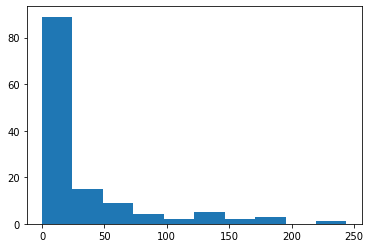

In [54]:
plt.hist(apps_clean["Time to first touchpoint - days"]);

#### Add Column: Time from First touchpoint to Close date

In [55]:
apps_clean[apps_clean['First touchpoint Date']>apps_clean['Close Date']]

,Bootcamp Course,Bootcamp Format,Bootcamp Year,Bootcamp Start Date,Campus - Timezone,Created Date,Close Date,Stage,Discount Amount (converted),Scholarship Amount (converted),...,Person Account: Looking for a Job,Person Account: Nationality,Stage Duration,Account: Last Modified Date,First touchpoint Date,Hours Before First Touchpoint,Person Account: City Before Course,Person Account: Eligible to Work In,Paid Deposit,Time to first touchpoint - days
11,DA,FT,2020,2020-06-22,BCN,2020-02-16,2020-03-31,Closed lost,0.0,0.0,...,Yes,Europa-Asia,181.0,2020-08-10,2020-04-23,1606.52,Milan,Yes,0,67
12,WD,FT,2020,2020-02-17,BCN,2020-01-24,2020-03-31,Closed lost,0.0,0.0,...,Yes,Americas,306.0,2020-08-10,2020-06-02,310.30,Barcelona,Yes,0,130
15,DA,FT,2020,2020-06-22,BCN,2020-04-04,2020-06-30,Closed lost,0.0,0.0,...,Yes,Spain,180.0,2020-08-10,2020-08-04,105.76,Sabadell,Yes,0,122
20,WD,FT,2020,2020-09-28,BCN,2020-01-31,2020-06-04,Paid Deposit,0.0,0.0,...,Yes,Spain,246.0,2020-07-12,2020-08-06,3095.79,Barcelona,Yes,1,188
24,UX,PT,2020,2020-06-16,BCN,2020-03-03,2020-04-20,Paid Deposit,0.0,0.0,...,Yes,Spain,236.0,2020-09-19,2020-06-03,68.63,Castellon,Yes,1,92
34,DA,FT,2020,2020-10-19,BCN,2020-01-07,2020-07-13,Paid Deposit,500.0,0.0,...,Yes,Spain,148.0,2020-06-12,2020-09-07,193.91,Barcelona,Yes,1,244
40,DA,FT,2020,2020-06-22,BCN,2020-02-25,2020-03-31,Closed lost,0.0,0.0,...,No,Spain,174.0,2020-08-10,2020-04-16,1223.51,Barcelona,Yes,0,51
44,DA,FT,2020,2020-10-19,BCN,2020-07-22,2020-08-14,Paid Deposit,0.0,0.0,...,Yes,Spain,118.0,2020-11-29,2020-10-08,456.81,Barcelona,Yes,1,78
48,DA,FT,2020,2020-10-19,BCN,2020-04-16,2020-06-30,Closed lost,500.0,0.0,...,Yes,Europa-Asia,64.0,2020-08-10,2020-08-31,3294.09,Gu,Yes,0,137
65,WD,PT,2021,2021-09-02,BCN,2020-09-28,2020-09-30,Technical Interview,0.0,0.0,...,Yes,Spain,43.0,2020-10-26,2020-10-22,571.72,Barcelona,Yes,0,24


In [56]:
apps_clean.drop(apps_clean[apps_clean['First touchpoint Date']>apps_clean['Close Date']].index, inplace=True)  

In [57]:
apps_clean["Time First touchpoint to Close date - days"]=(apps_clean['Close Date'
                                                                          ] - apps_clean['First touchpoint Date']).dt.days


In [58]:
apps_clean["Time First touchpoint to Close date - days"]

0       34
1        5
2       36
3       70
4        1
      ... 
142     55
143    275
144     31
145     65
146     65
Name: Time First touchpoint to Close date - days, Length: 116, dtype: int64

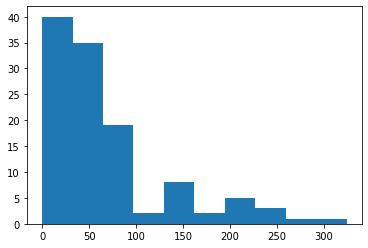

In [59]:
plt.hist(apps_clean["Time First touchpoint to Close date - days"]);

#### Add Column: Scholarship & Discount

In [60]:
apps_clean["Scholarship"]= [0 if value == 0.00 else 1 for value in apps_clean["Scholarship Amount (converted)"]]
apps_clean["Discount"]= [0 if value == 0.00 else 1 for value in apps_clean["Discount Amount (converted)"]]

#### Add Column: Time Conversion (days)
Time taken to convert the lead from it's creation to it's closure

In [61]:
apps_clean["Time Conversion - days"]= (apps_clean['Close Date'] - apps_clean['Created Date']).dt.days

#### Add Column: Time between Created Date and Start Date (days)

In [62]:
apps_clean["Time between Created Date and Start Date - days"]= (apps_clean['Bootcamp Start Date'
                                                                          ] - apps_clean['Created Date']).dt.days

#### Add Column: % Discount

Later we'll remove the amount use to creat this column

In [63]:
apps_clean["Discount(%)"]= 1- (round(apps_clean["Net Amount With VAT (converted)"]  / apps_clean["Amount (converted)"],2) )


#### Add Column: Creater Month 
Aggregate Creater Date by month

In [64]:
apps_clean["Creater Month"]=apps_clean['Created Date'].dt.month

#### Add Column: Creater Quarter 
Aggregate Creater Date by quarter

In [65]:
apps_clean["Creater Quarter"]=apps_clean['Created Date'].dt.quarter

#### Drop columns used to create the new ones and that now have no more use & we remove bootcamp year as +data from 2020 than 2021


In [66]:
apps_clean.columns

Index(['Bootcamp Course', 'Bootcamp Format', 'Bootcamp Year',
       'Bootcamp Start Date', 'Campus - Timezone', 'Created Date',
       'Close Date', 'Stage', 'Discount Amount (converted)',
       'Scholarship Amount (converted)', 'Amount (converted)',
       'Net Amount With VAT (converted)', 'Drop', 'Drop Reason',
       'how did you hear about us?', 'Person Account: Tech Background',
       'Person Account: Gender', 'Person Account: Highest degree received',
       'Person Account: Looking for a Job', 'Person Account: Nationality',
       'Stage Duration', 'Account: Last Modified Date',
       'First touchpoint Date', 'Hours Before First Touchpoint',
       'Person Account: City Before Course',
       'Person Account: Eligible to Work In', 'Paid Deposit',
       'Time to first touchpoint - days',
       'Time First touchpoint to Close date - days', 'Scholarship', 'Discount',
       'Time Conversion - days',
       'Time between Created Date and Start Date - days', 'Discount(%)',
   

In [67]:
apps_clean.drop(columns=['Bootcamp Start Date','Created Date','Close Date', 'Stage',
                         'Discount Amount (converted)','Scholarship Amount (converted)', 
                         'Amount (converted)','Net Amount With VAT (converted)',
                         'Account: Last Modified Date','First touchpoint Date',
                        'Campus - Timezone','Bootcamp Year','Drop','Drop Reason'], inplace=True)

In [68]:
apps_clean.head()

,Bootcamp Course,Bootcamp Format,how did you hear about us?,Person Account: Tech Background,Person Account: Gender,Person Account: Highest degree received,Person Account: Looking for a Job,Person Account: Nationality,Stage Duration,Hours Before First Touchpoint,...,Paid Deposit,Time to first touchpoint - days,Time First touchpoint to Close date - days,Scholarship,Discount,Time Conversion - days,Time between Created Date and Start Date - days,Discount(%),Creater Month,Creater Quarter
0,WD,FT,Referral,No experience,Female,Bachelor Degree,Yes,Americas,77.0,1010.94,...,0,42,34,0,1,76,74,0.10,7,3
1,WD,FT,Referral,I don´t have experience,Male,No Formal Schooling,Yes,Spain,229.0,1275.60,...,0,53,5,0,0,58,148,0.00,2,1
2,UX,PT,Referral,Beginning learner,Male,Bachelor Degree,Yes,Spain,102.0,149.47,...,1,6,36,0,1,42,74,0.07,7,3
3,DA,FT,newspaperOrMagazine,No experience,Male,Bachelor Degree,Yes,Spain,218.0,1.69,...,1,0,70,0,0,70,206,0.00,3,1
4,DA,FT,google,No experience,Female,Bachelor Degree,Yes,Americas,99.0,88.11,...,0,4,1,0,1,5,116,0.10,6,2


In [69]:
apps_clean.shape

(116, 22)

In [70]:
apps_clean.columns

Index(['Bootcamp Course', 'Bootcamp Format', 'how did you hear about us?',
       'Person Account: Tech Background', 'Person Account: Gender',
       'Person Account: Highest degree received',
       'Person Account: Looking for a Job', 'Person Account: Nationality',
       'Stage Duration', 'Hours Before First Touchpoint',
       'Person Account: City Before Course',
       'Person Account: Eligible to Work In', 'Paid Deposit',
       'Time to first touchpoint - days',
       'Time First touchpoint to Close date - days', 'Scholarship', 'Discount',
       'Time Conversion - days',
       'Time between Created Date and Start Date - days', 'Discount(%)',
       'Creater Month', 'Creater Quarter'],
      dtype='object')

## CleanCSV 

In [71]:
apps_clean.to_csv("apps_BCN20201_clean_Sel_addCols.csv", index=False)